In [1]:
# Calling librarries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import klib
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_regression

In [2]:
df=pd.read_csv("Walmart.csv")

# Introduction dataset

In [4]:
df.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


# Data Processing

In [3]:
# data cleaning and decrease memory usage od data with klib

df=klib.data_cleaning(df)

Shape of cleaned data: (6435, 8) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.21 MB (-53.85%)



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   store         6435 non-null   int8    
 1   date          6435 non-null   category
 2   weekly_sales  6435 non-null   float64 
 3   holiday_flag  6435 non-null   int8    
 4   temperature   6435 non-null   float32 
 5   fuel_price    6435 non-null   float32 
 6   cpi           6435 non-null   float32 
 7   unemployment  6435 non-null   float32 
dtypes: category(1), float32(4), float64(1), int8(2)
memory usage: 181.3 KB


In [7]:
df["date"]

0       05-02-2010
1       12-02-2010
2       19-02-2010
3       26-02-2010
4       05-03-2010
           ...    
6430    28-09-2012
6431    05-10-2012
6432    12-10-2012
6433    19-10-2012
6434    26-10-2012
Name: date, Length: 6435, dtype: category
Categories (143, object): ['01-04-2011', '01-06-2012', '01-07-2011', '01-10-2010', ..., '30-09-2011', '30-12-2011', '31-08-2012', '31-12-2010']

In [4]:
# Future transforming (Time based)

df["date"]=pd.to_datetime(df["date"],format="mixed")
df["year"]=df["date"].dt.year
df["month"]=df["date"].dt.month
df["day"]=df["date"].dt.day

In [5]:
# dropping old column("date")

df.drop(["date"],axis=1,inplace=True)

In [10]:
df.tail(3)

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,day
6432,45,734464.36,0,54.470001,4.000,192.327271,8.667,2012,12,10
6433,45,718125.53,0,56.470001,3.969,192.330856,8.667,2012,10,19
6434,45,760281.43,0,58.849998,3.882,192.308899,8.667,2012,10,26


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         6435 non-null   int8   
 1   weekly_sales  6435 non-null   float64
 2   holiday_flag  6435 non-null   int8   
 3   temperature   6435 non-null   float32
 4   fuel_price    6435 non-null   float32
 5   cpi           6435 non-null   float32
 6   unemployment  6435 non-null   float32
 7   year          6435 non-null   int32  
 8   month         6435 non-null   int32  
 9   day           6435 non-null   int32  
dtypes: float32(4), float64(1), int32(3), int8(2)
memory usage: 238.9 KB


# Data Analysis (Visualization)

In [12]:
df["temperature"].value_counts()

temperature
50.430000    11
67.870003    10
76.029999     9
76.669998     9
70.279999     9
             ..
59.980000     1
62.520000     1
65.879997     1
68.779999     1
62.270000     1
Name: count, Length: 3528, dtype: int64

<Axes: xlabel='weekly_sales', ylabel='temperature'>

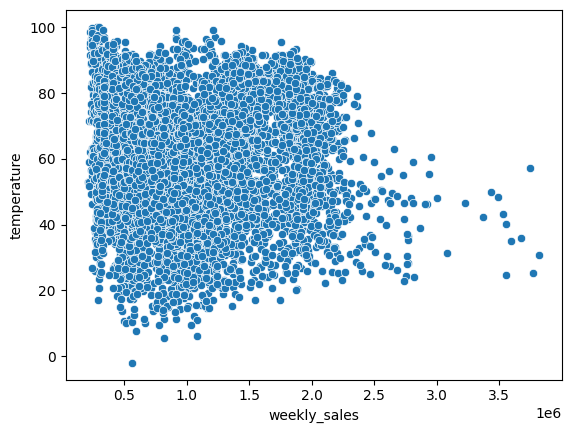

In [13]:
sns.scatterplot(data=df,x="weekly_sales",y="temperature") # visualization beetween target variable("weekly sales") vs feature ("temperature") 

In [14]:
df["store"].value_counts()

store
1     143
2     143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
22    143
23    143
24    143
25    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
45    143
Name: count, dtype: int64

<Axes: xlabel='weekly_sales', ylabel='store'>

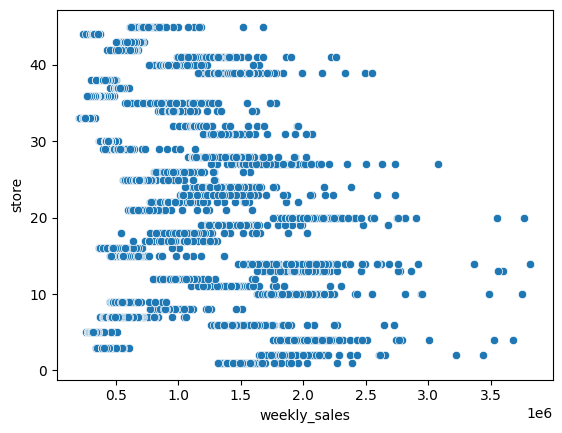

In [15]:
sns.scatterplot(data=df,x="weekly_sales",y="store") # visualization beetween target variable("weekly sales") vs feature ("store")

In [16]:
df["fuel_price"].value_counts()

fuel_price
3.638    39
3.630    34
2.771    29
3.891    29
3.594    28
         ..
3.053     1
3.392     1
3.404     1
3.490     1
3.576     1
Name: count, Length: 892, dtype: int64

<Axes: xlabel='weekly_sales', ylabel='fuel_price'>

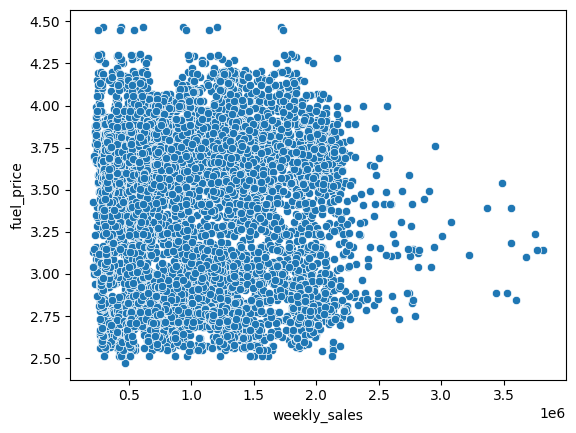

In [17]:
sns.scatterplot(data=df,x="weekly_sales",y="fuel_price") # visualization beetween target variable("weekly sales") vs feature ("fuel_price")

In [18]:
df["unemployment"].value_counts()

unemployment
8.099    78
8.163    56
7.852    56
8.200    52
7.931    52
         ..
5.422     4
3.879     4
5.329     4
8.665     4
5.217     4
Name: count, Length: 349, dtype: int64

<Axes: xlabel='weekly_sales', ylabel='unemployment'>

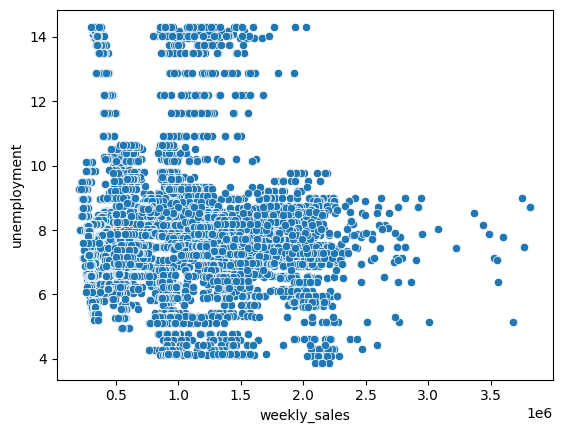

In [19]:
sns.scatterplot(data=df,x="weekly_sales",y="unemployment") # visualization beetween target variable("weekly sales") vs feature ("unemployment")

In [20]:
df["holiday_flag"].value_counts()

holiday_flag
0    5985
1     450
Name: count, dtype: int64

<Axes: xlabel='holiday_flag', ylabel='weekly_sales'>

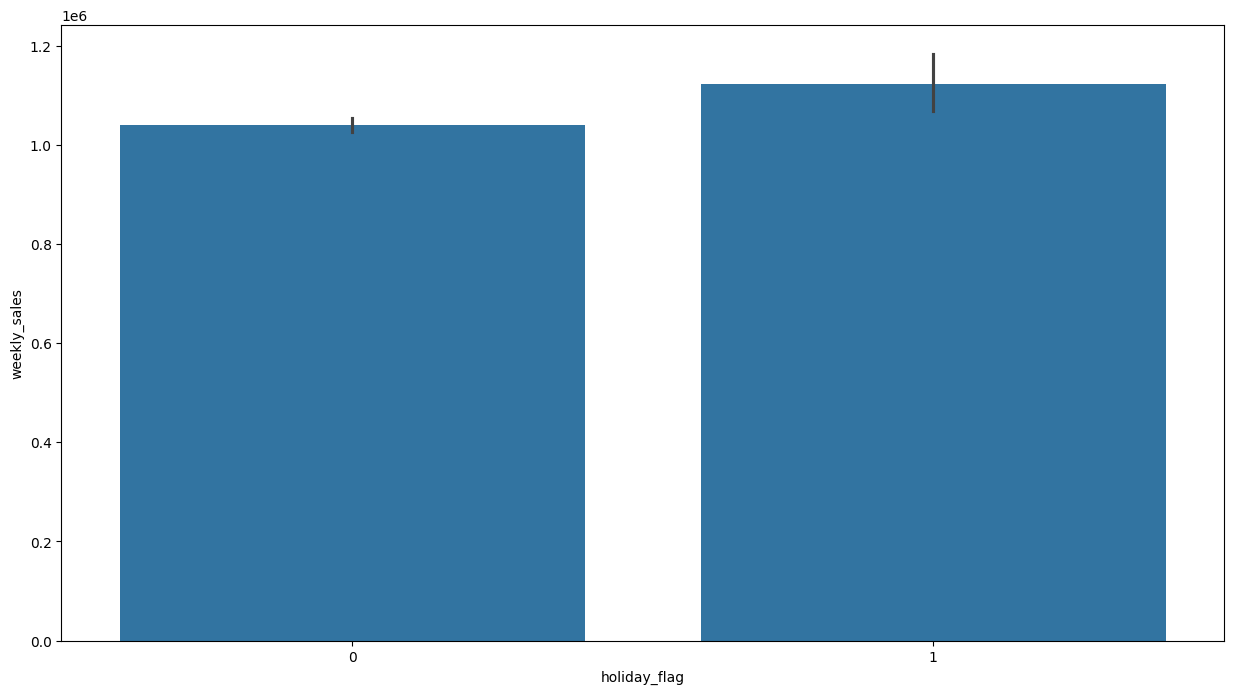

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df,y="weekly_sales",x="holiday_flag") # visualization beetween target variable("weekly sales") vs feature ("unployment")

# Feature Engineering

In [6]:
#Creating new features
df['sales_per_day'] = df['weekly_sales'] / df['day']
df['sales_per_month'] = df['weekly_sales'] / df['month']
df['sales_per_year'] = df['weekly_sales'] / df['year']


In [7]:
# More feature engineering
# Interaction between temperature and fuel price
df['temp_fuel_interaction'] = df['temperature'] * df['fuel_price']

# Interaction between holiday flag and month (holidays may have more effect in certain months)
df['holiday_month_interaction'] = df['holiday_flag'] * df['month']


In [8]:
# Ratio of fuel price to CPI
df['fuel_price_to_cpi'] = df['fuel_price'] / df['cpi']

# Ratio of unemployment to CPI
df['unemployment_to_cpi'] = df['unemployment'] / df['cpi']


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   store                      6435 non-null   int8   
 1   weekly_sales               6435 non-null   float64
 2   holiday_flag               6435 non-null   int8   
 3   temperature                6435 non-null   float32
 4   fuel_price                 6435 non-null   float32
 5   cpi                        6435 non-null   float32
 6   unemployment               6435 non-null   float32
 7   year                       6435 non-null   int32  
 8   month                      6435 non-null   int32  
 9   day                        6435 non-null   int32  
 10  sales_per_day              6435 non-null   float64
 11  sales_per_month            6435 non-null   float64
 12  sales_per_year             6435 non-null   float64
 13  temp_fuel_interaction      6435 non-null   float

In [92]:
X=df.columns

In [117]:
df=df.drop(columns="store",axis=1)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   store                      6435 non-null   int8   
 1   weekly_sales               6435 non-null   float64
 2   holiday_flag               6435 non-null   int8   
 3   temperature                6435 non-null   float32
 4   fuel_price                 6435 non-null   float32
 5   cpi                        6435 non-null   float32
 6   unemployment               6435 non-null   float32
 7   year                       6435 non-null   int32  
 8   month                      6435 non-null   int32  
 9   day                        6435 non-null   int32  
 10  sales_per_day              6435 non-null   float64
 11  sales_per_month            6435 non-null   float64
 12  sales_per_year             6435 non-null   float64
 13  temp_fuel_interaction      6435 non-null   float

In [11]:
X=df.columns

In [71]:
encoder=LabelEncoder()
df["store"]=encoder.fit_transform(df["store"])

In [73]:
df["store"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

In [74]:
# Cheaking importantce features with mutual information

mutual_info = mutual_info_regression(X,y)


mutual_info_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mutual_info
})


mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)
mutual_info_df

ValueError: could not convert string to float: 'store'

In [104]:
df=klib.data_cleaning(df)

Shape of cleaned data: (6435, 17) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.03 MB (-6.25%)



In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   store                      6435 non-null   int8   
 1   weekly_sales               6435 non-null   float64
 2   holiday_flag               6435 non-null   int8   
 3   temperature                6435 non-null   float32
 4   fuel_price                 6435 non-null   float32
 5   cpi                        6435 non-null   float32
 6   unemployment               6435 non-null   float32
 7   year                       6435 non-null   int32  
 8   month                      6435 non-null   int32  
 9   day                        6435 non-null   int32  
 10  sales_per_day              6435 non-null   float64
 11  sales_per_month            6435 non-null   float64
 12  sales_per_year             6435 non-null   float32
 13  temp_fuel_interaction      6435 non-null   float

In [33]:
len(feature_importance)

16

In [31]:
feature_importance = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Feature Importance (F-Score)': feature_importance
})


importance_df = importance_df.sort_values(by='Feature Importance (F-Score)', ascending=False)
import pandas as pd





print(importance_df)

                      Feature  Feature Importance (F-Score)
11             sales_per_year                  9.997578e-01
10            sales_per_month                  1.957745e-04
6                        year                  1.968887e-05
3                  fuel_price                  7.873980e-06
12      temp_fuel_interaction                  7.460522e-06
2                 temperature                  4.617599e-06
5                unemployment                  3.433191e-06
15        unemployment_to_cpi                  1.711872e-06
0                       store                  4.640658e-07
8                         day                  2.701647e-07
14          fuel_price_to_cpi                  2.444268e-07
4                         cpi                  2.323968e-07
9               sales_per_day                  2.229083e-07
7                       month                  2.127809e-07
13  holiday_month_interaction                  2.814023e-08
1                holiday_flag           

In [48]:
df.head(3)

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,day,sales_per_day,sales_per_month,sales_per_year,temp_fuel_interaction,holiday_month_interaction,fuel_price_to_cpi,unemployment_to_cpi
0,1,1643690.90,0,42.310001,2.572,211.096359,8.106,2010,5,2,821845.45,328738.180000,817.756667,108.821327,0,0.012184,0.038400
1,1,1641957.44,1,38.509998,2.548,211.242172,8.106,2010,12,2,820978.72,136829.786667,816.894249,98.123482,12,0.012062,0.038373
2,1,1611968.17,0,39.930000,2.514,211.289139,8.106,2010,2,19,84840.43,805984.085000,801.974214,100.384018,0,0.011898,0.038364


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   store                      6435 non-null   int8   
 1   weekly_sales               6435 non-null   float64
 2   holiday_flag               6435 non-null   int8   
 3   temperature                6435 non-null   float32
 4   fuel_price                 6435 non-null   float32
 5   cpi                        6435 non-null   float32
 6   unemployment               6435 non-null   float32
 7   year                       6435 non-null   int32  
 8   month                      6435 non-null   int32  
 9   day                        6435 non-null   int32  
 10  sales_per_day              6435 non-null   float64
 11  sales_per_month            6435 non-null   float64
 12  sales_per_year             6435 non-null   float64
 13  temp_fuel_interaction      6435 non-null   float

# Train Process

In [50]:
y=df["weekly_sales"]# target variable 

In [51]:
x=df.drop(columns="weekly_sales",axis=1) # input columns

In [52]:
x.head(3)

,store,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,day,sales_per_day,sales_per_month,sales_per_year,temp_fuel_interaction,holiday_month_interaction,fuel_price_to_cpi,unemployment_to_cpi
0,1,0,42.310001,2.572,211.096359,8.106,2010,5,2,821845.45,328738.180000,817.756667,108.821327,0,0.012184,0.038400
1,1,1,38.509998,2.548,211.242172,8.106,2010,12,2,820978.72,136829.786667,816.894249,98.123482,12,0.012062,0.038373
2,1,0,39.930000,2.514,211.289139,8.106,2010,2,19,84840.43,805984.085000,801.974214,100.384018,0,0.011898,0.038364


In [53]:
y[:5]

0    1643690.90
1    1641957.44
2    1611968.17
3    1409727.59
4    1554806.68
Name: weekly_sales, dtype: float64

In [54]:
# data spliting

x_train,x_temp,y_train,y_temp=train_test_split(x,y,test_size=0.2,random_state=42)
x_test,x_val,y_test,y_val=train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)

In [55]:
x_train.shape,y_train.shape

((5148, 16), (5148,))

In [56]:
x_test.shape,x_val.shape,y_val.shape,y_test.shape

((643, 16), (644, 16), (644,), (643,))

# scaling

In [57]:
# Using MinMaxSacler

scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_val_scaled=scaler.fit_transform(x_val)
x_test_scaled=scaler.fit_transform(x_test)

In [58]:
x_train_scaled

array([[0.15909091, 0.        , 0.75714286, ..., 0.        , 0.0140738 ,
        0.08284605],
       [0.13636364, 0.        , 0.2227006 , ..., 0.        , 0.26169098,
        0.26327754],
       [0.93181818, 0.        , 0.6193738 , ..., 0.        , 0.5824103 ,
        0.53877612],
       ...,
       [0.81818182, 0.        , 0.86859099, ..., 0.        , 0.24533169,
        0.17859098],
       [0.84090909, 1.        , 0.45694716, ..., 1.        , 0.6548388 ,
        0.84402704],
       [0.13636364, 0.        , 0.28708416, ..., 0.        , 0.07833261,
        0.28124631]], shape=(5148, 16))

In [65]:
# Model selecting and training model (for "Linear Model")
model=RandomForestRegressor()
model.fit(x_train_scaled,y_train)

RandomForestRegressor()

In [66]:
y_pred=model.predict(x_test_scaled)

In [67]:
y[:3]

0    1643690.90
1    1641957.44
2    1611968.17
Name: weekly_sales, dtype: float64

In [68]:
y_pred[:3]

array([2138357.737 ,  460284.0343,  603113.8926])

In [69]:
# Using dictionary data_stucture

metrics={
    "Mean Squared Error":mean_squared_error(y_test,y_pred),
    "R2 score":r2_score(y_test,y_pred)
}

In [70]:
# Checking results for Liner model

print(metrics)

{'Mean Squared Error': 195908158171.74942, 'R2 score': 0.3746089746834108}


# Results without Scaling and Featue Engeenering

In [ ]:
# For Linear Model without scaling and without Feature engineering

'Mean Squared Error': 255968284912.51254, 'R2 score': 0.18288105179558

# For Decision Tree Regressor Model without scaling and without Feature engineering
'Mean Squared Error': 22749624863.787273, 'R2 score': 0.9273771375735218


# For Random Forest Regressor Model without scaling and without Feature engineering
'Mean Squared Error': 15532463173.134228, 'R2 score': 0.9504162401393076

# Results after scaling

In [ ]:
# For Linear Model  without Feature engineering

'Mean Squared Error': 255968284912.51254, 'R2 score': 0.18288105179558

# For Decision Tree Regressor Model without Feature engineering
'Mean Squared Error': 23581301884.924866, 'R2 score': 0.9247222029866451


# For Random Forest Regressor Model  without Feature engineering
'Mean Squared Error': 15504143070.006598, 'R2 score': 0.9505066454521712

# Results after scaling and Feature Engineering 

In [ ]:
# For Decision Tree Regressor Model with scaling and with Feature engineering
'Mean Squared Error': 190979255540.6439, 'R2 score': 0.39034334480316024


# For Random Forest Regressor Model with scaling and with Feature engineering
''Mean Squared Error': 195908158171.74942, 'R2 score': 0.3746089746834108